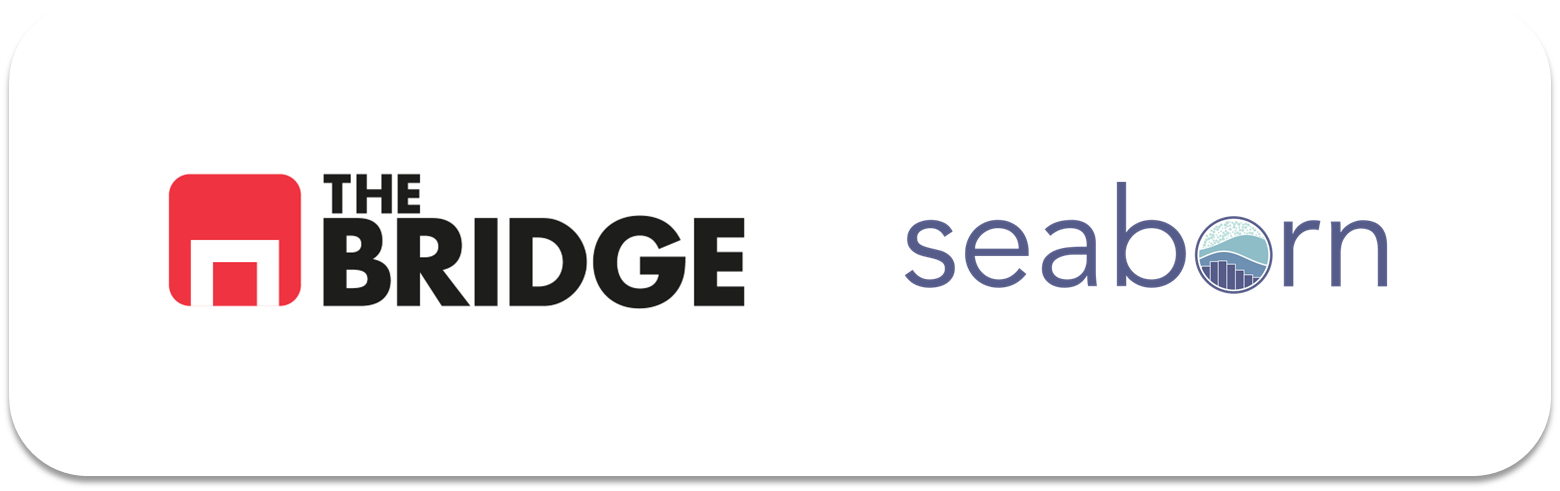

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship, plot_categorical_relationship_fin, plot_combined_graphs, plot_grouped_boxplots, plot_grouped_histograms, bubble_plot, pinta_distribucion_categoricas

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [13]:
df_cities = pd.read_csv("./data/california_cities.csv", index_col=0)

In [14]:
df_cities.dropna(inplace=True)

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [15]:
def diagrama_dispersion(df, col_x, col_y, hue_col=None, size_col=None, escala=1, mostrar_leyenda=True):
    """
    Scatter plot with numeric color and size by column.
    """
    plt.figure(figsize=(10,8))
    
    if isinstance(size_col, str):
        if size_col not in df.columns:
            raise ValueError(f"La columna '{size_col}' no existe en el dataframe")
        tamanos = df[size_col] * escala
    else:
        tamanos = size_col
    
    # Plot
    if hue_col is not None:
        sns.scatterplot(data=df,
            x= col_x,
            y= col_y ,
            hue= hue_col,
            s = tamanos,
            alpha=0.7
        )
    else:
        sns.scatterplot(
            x=df[col_x],
            y=df[col_y],
            s=tamanos,
            alpha=0.7
        )
    
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f"Scatter: {col_x} vs {col_y}")
    plt.tight_layout()
    plt.show()

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

In [16]:
df_cities["log_poblacion"] = np.log10(df_cities["population_total"])

In [17]:
df_cities.head()

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,log_poblacion
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03,4.501949
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37,4.308137
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01,4.919544
5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00,4.679637
6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57,3.451326


TypeError: cannot convert the series to <class 'float'>

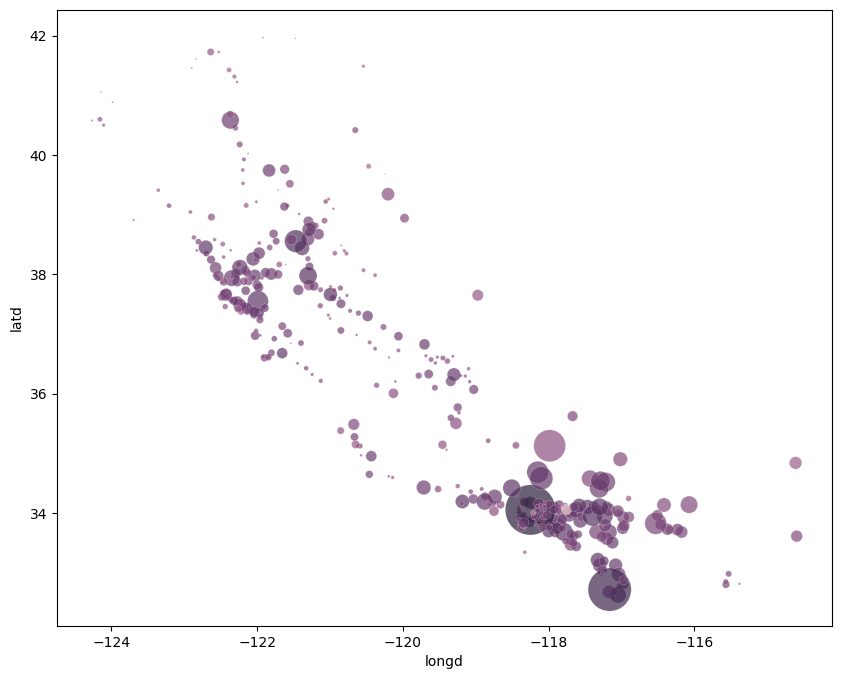

In [18]:
diagrama_dispersion(df_cities,"longd","latd","log_poblacion","area_total_km2")

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

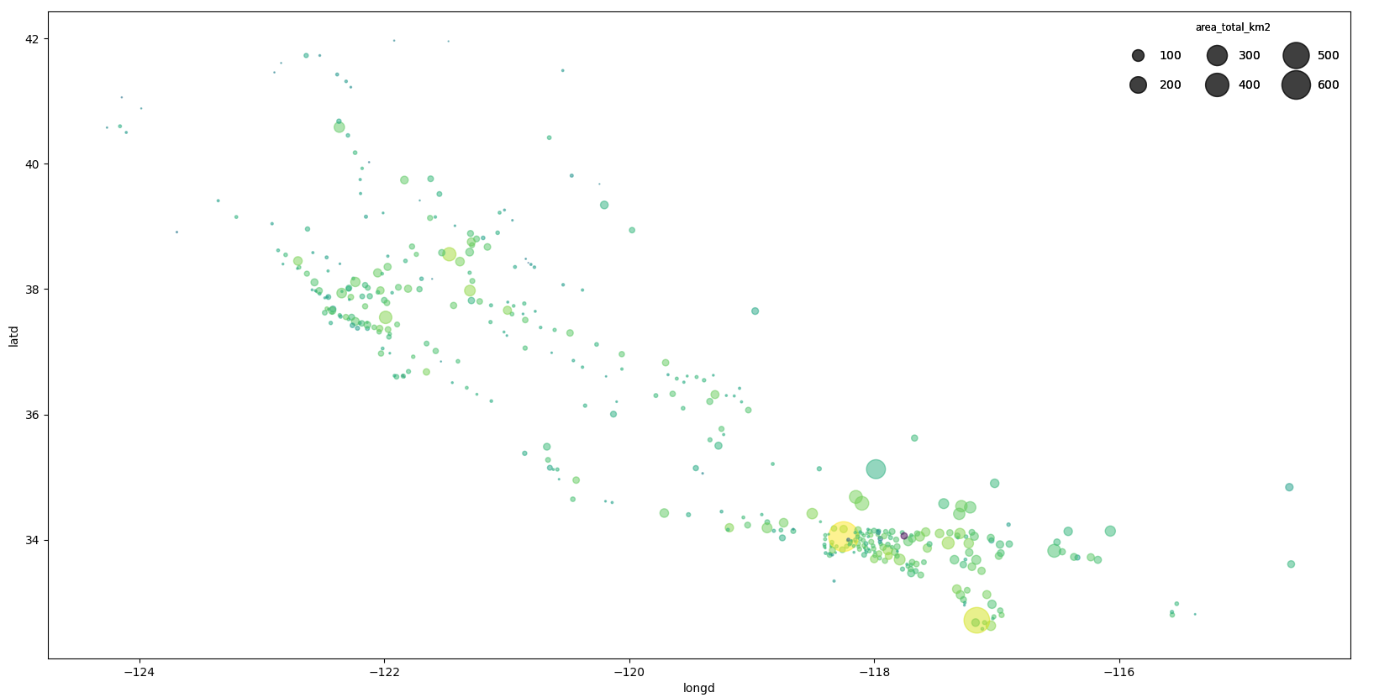

## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)

In [ ]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [ ]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# drop columnas que no necesitamos
df = df_titanic.drop(columns=["parch","deck","embarked","sibsp","survived","pclass"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   fare         891 non-null    float64
 3   class        891 non-null    object 
 4   who          891 non-null    object 
 5   adult_male   891 non-null    bool   
 6   embark_town  889 non-null    object 
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(2), float64(2), object(5)
memory usage: 50.6+ KB


In [19]:
# rellenar nulos de "embar_town" con el mode
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

In [20]:
df["embark_town"].value_counts(dropna=False)

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [21]:
# rellenar edad con el median. Podria filtrar por who para hacer edad mediana de mujeres, hombres etc.
# pero por tiempo, computo el mediana de la columna.
df["age"] = df["age"].fillna(df["age"].median())

# Pregunta 1
1. El titanic fue un accidente con una tasa de mortalidad alta. 

In [22]:
df.alive.value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [23]:
df.alive.value_counts(normalize=True)*100

alive
no     61.616162
yes    38.383838
Name: proportion, dtype: float64

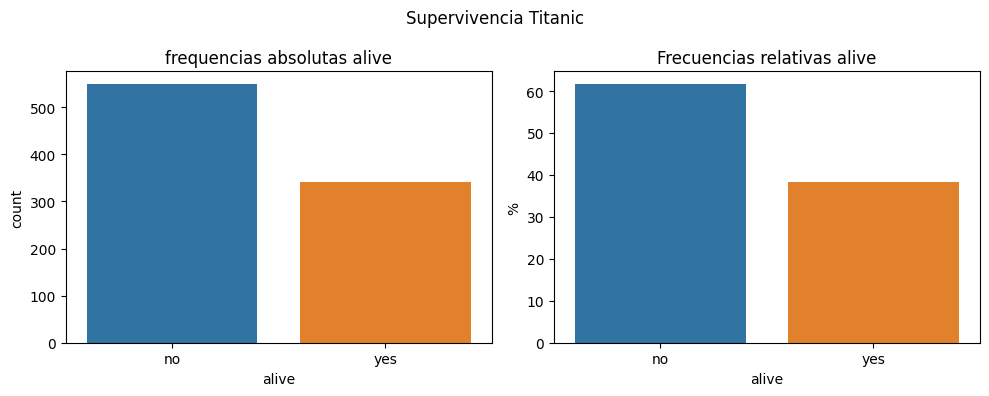

In [24]:
### Creo figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Supervivencia Titanic");
sns.countplot(x = "alive", data=df, ax = axs[0], hue = "alive")
axs[0].set_title("frequencias absolutas alive")

valores = df_titanic.alive.value_counts(normalize = True) * 100 
sns.barplot(x= valores.index, y = valores.values,hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativas alive")
axs[1].set_ylabel("%")

plt.tight_layout()
plt.show()

##### Conclusion 1
Los datos confirman que el titanic fue un accidente con una alta tasa de mortalidad.
 - 549 no sobrevivieron, un 62% del total de los pasajeros
 - Solo sobrevivieron 342 personas, un 38% del total.

# Pregunta 2
2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero... 

In [25]:
tabla_contingencia = pd.crosstab(df["alive"],df["who"])
tabla_contingencia

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [26]:
cat_colx = "alive"
cat_coly = "who"
frecuencias_absolutas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_relativas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize=True)
print(frecuencias_absolutas)
print(frecuencias_relativas)

     who alive  count
0  child   yes     49
1  child    no     34
2    man    no    449
3    man   yes     88
4  woman   yes    205
5  woman    no     66
     who alive  proportion
0  child   yes    0.590361
1  child    no    0.409639
2    man    no    0.836127
3    man   yes    0.163873
4  woman   yes    0.756458
5  woman    no    0.243542


In [27]:
frecuencias_relativas["proportion"] *= 100

In [28]:
frecuencias_relativas

,who,alive,proportion
0,child,yes,59.036145
1,child,no,40.963855
2,man,no,83.612663
3,man,yes,16.387337
4,woman,yes,75.645756
5,woman,no,24.354244


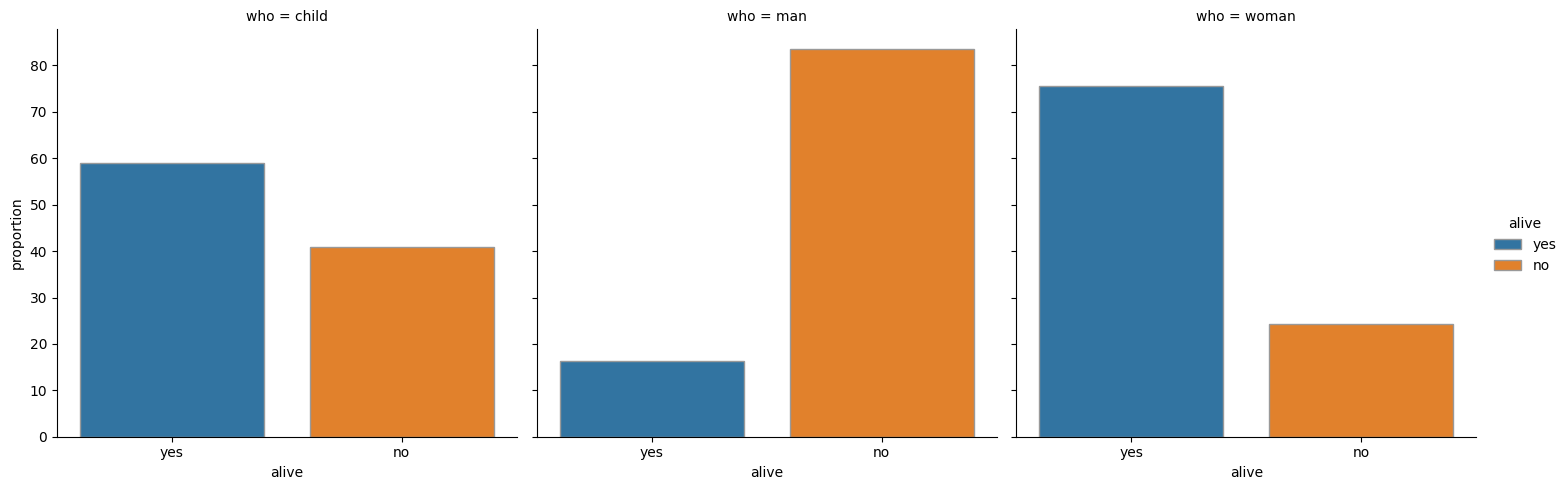

In [29]:
sns.catplot(x="alive",
            y = "proportion",
            col = "who",
            kind="bar",
            edgecolor=".6",
            hue = "alive",
            legend= True,
            data= frecuencias_relativas);

##### Conclusion 2
Aqui podemos ver claramente, que los mujeres y los niños tenien preferencia de evacuacion, dado que un gran porcentaje del total de mujeres (76%) y niños (59%) sobrevivieron y un porcentaje muy pequeño de hombres (16%) sobrevivieron.

## Pregunta 3
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar... 

In [30]:
tabla_contigencia_3 = pd.crosstab(df["class"],df["alive"])
tabla_contigencia_3

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


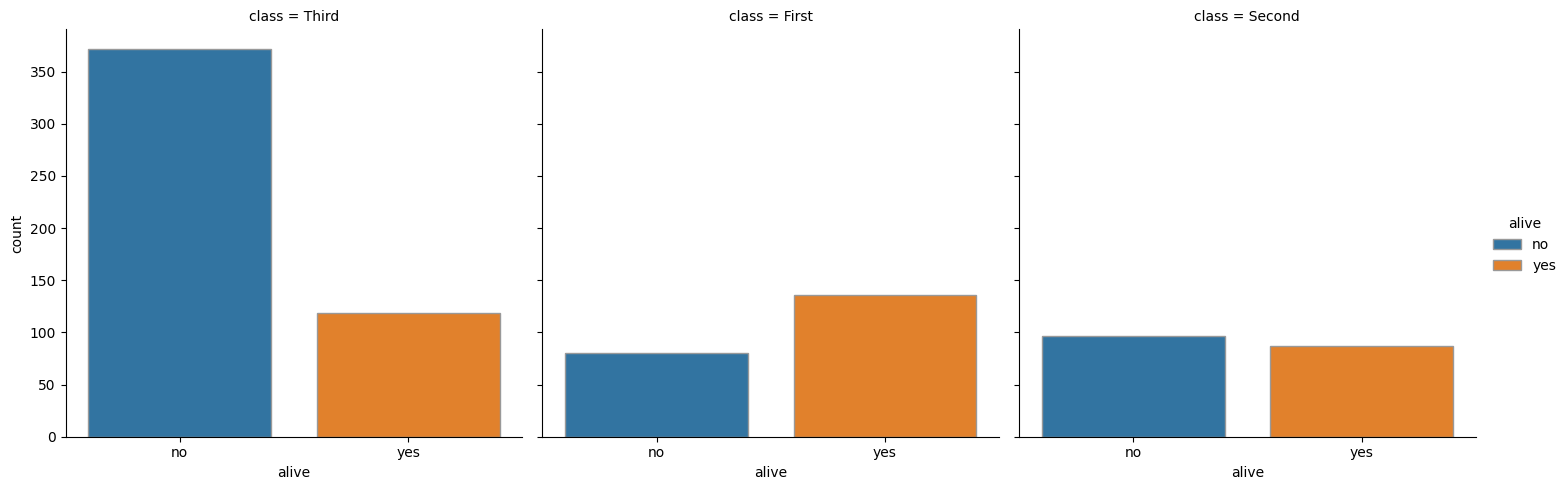

In [31]:
sns.catplot(x="alive",
            col = "class",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "alive",
            legend= True,
            data=df_titanic);

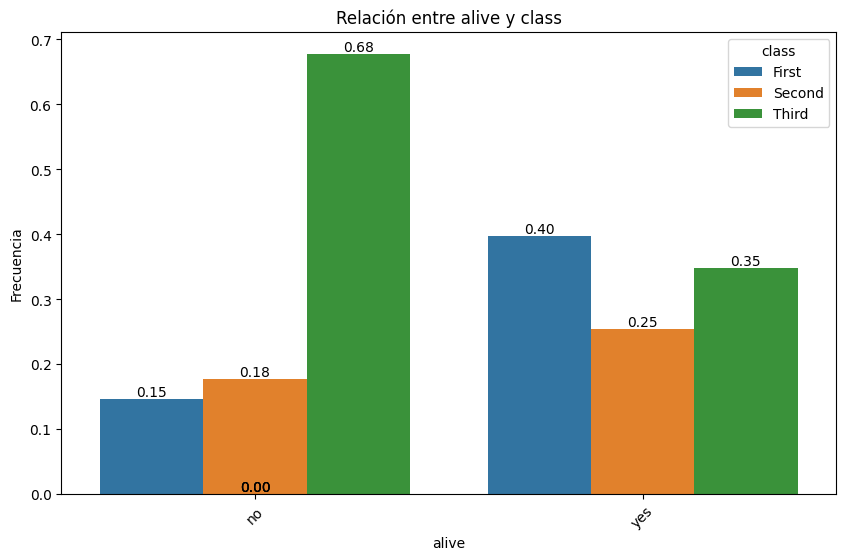

In [32]:
plot_categorical_relationship_fin(df,"alive","class",relative_freq=True,show_values=True)

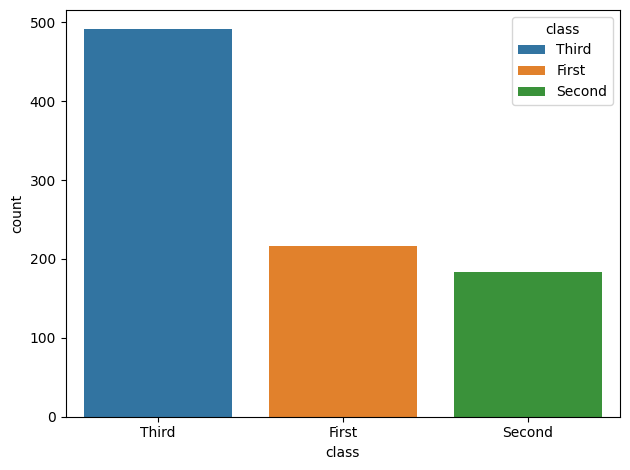

In [33]:
# Muestra un counplot para enseñar las diferencias de numero de pasajeros entre clases.
sns.countplot(x = "class", data = df, hue = "class", legend = True)
plt.tight_layout()
plt.show()

In [34]:
tabla_contigencia_4 = pd.crosstab(index = [df["class"],df["who"]],
                                  columns = df["alive"])
                                
tabla_contigencia_4.T

class First           Second           Third           
who   child man woman  child man woman child  man woman
alive                                                  
no        1  77     2      0  91     6    33  281    58
yes       5  42    89     19   8    60    25   38    56

In [35]:
cat_colx = "alive"
cat_coly = "class"
frecuencias_absolutas_class = df.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_relativas_class = df.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize=True)

In [36]:
frecuencias_relativas_class["proportion"] *= 100

In [37]:
frecuencias_relativas_class

,class,alive,proportion
0,First,yes,62.962963
1,First,no,37.037037
2,Second,no,52.717391
3,Second,yes,47.282609
4,Third,no,75.763747
5,Third,yes,24.236253


In [41]:
df["alive"].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

##### Conclusion 3

+ First class - sobrevivieron 136 personas
+ Second class - sobrevivieron 87 personas
+ Third class - sobrevivieron 119 personas

El clase en que viajaba los pasajeros tenia mucha influencia en si sobrevivieron o no. Vemos que sobrevivieron mas pasajeros de primera clase que los otros clases aunque no era el grupo mas grande de pasajeros.

Vemos que mas mujeres y ninos sobrevivieron de primera y segunda class comparado con tercera clase, aunque habia mas mujeres en total en tercera clase.

# Pregunta 4
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.

In [156]:
df["survived"] = df["alive"].map({"yes": 1, "no": 0})

In [157]:
ninos = df[df["who"] == "child"]
mujeres = df[df["who"] == "woman"]

In [ ]:
#Total number of children that survived
(ninos["alive"] == "yes").value_counts(normalize = True)*100

alive
True     59.036145
False    40.963855
Name: proportion, dtype: float64

In [187]:
# Relative frequency of survival of women
(mujeres["alive"]=="yes").value_counts(normalize = True)*100

alive
True     75.645756
False    24.354244
Name: proportion, dtype: float64

In [ ]:
# Relative frequency of total children in each class
ninos["class"].value_counts(normalize=True)*100

class
Third     69.879518
Second    22.891566
First      7.228916
Name: proportion, dtype: float64

In [188]:
# Relative frequency of total women in each class
mujeres["class"].value_counts(normalize=True)*100

class
Third     42.066421
First     33.579336
Second    24.354244
Name: proportion, dtype: float64

In [173]:
# Relative frequency of children survived in each class
supervivencia_ninos = ninos.groupby("class")["survived"].mean() * 100

In [177]:
# Relative frequency of women survived in each class
supervivencia_mujeres = mujeres.groupby("class")["survived"].mean() * 100

In [176]:
survival_summary = pd.DataFrame({
    "children_survival_%": supervivencia_ninos,
    "women_survival_%": supervivencia_mujeres
}).reset_index()

survival_summary

,class,children_survival_%,women_survival_%
0,First,83.333333,97.802198
1,Second,100.000000,90.909091
2,Third,43.103448,49.122807


In [ ]:
subset_wom_child = df[df["who"].isin(["child", "woman"])]

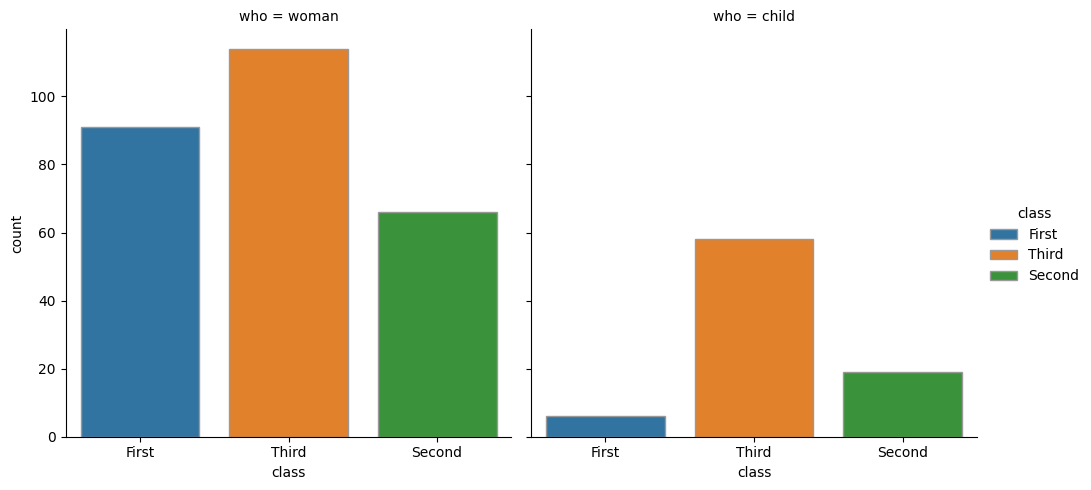

In [192]:
sns.catplot(x="class",
            col = "who",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "class",
            legend= True,
            data=subset_wom_child);

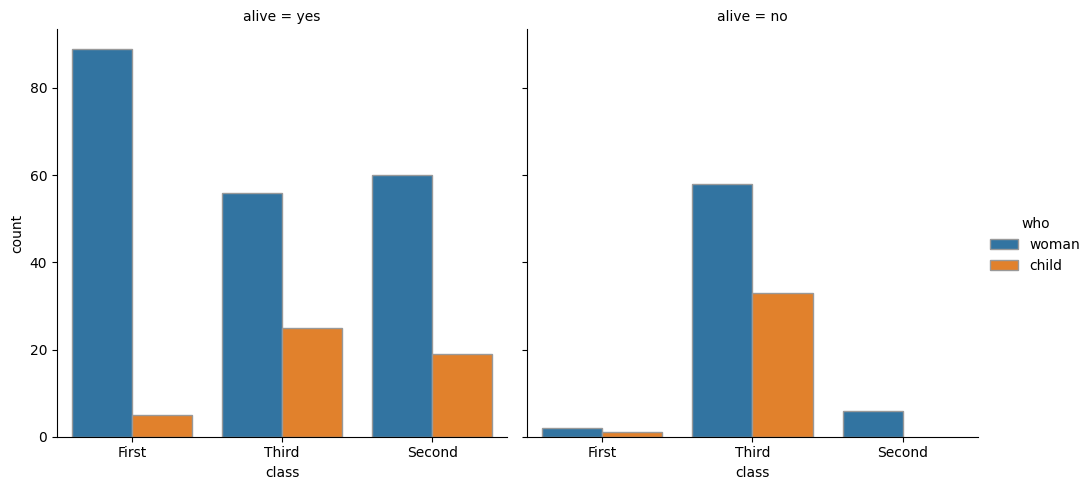

In [ ]:
sns.catplot(x="class",
            col = "alive",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "who",
            legend= True,
            data=subset_wom_child);

### Conclusion 4
Estudiando la informacion, podemos ver que la mayoria del total de las mujeres viajaban en primera y segunda clase, lo cual tenian una tasa alta de supervivencia (entre 90 - 98 %), mientras la mayoria del total de los niños viajaban en tercera clase (70%) 
Esto significa que, aunque habia una tasa de supervivencia muy alta de niños en primera y segunda clase, la tasa de supervivencia de niños en tercera clase ( donde viajaban ) era por debajo del 50%, por lo cual la tasa de supervivencia de los niños en general era menor que la de las mujeres.

# Pregunta 5
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

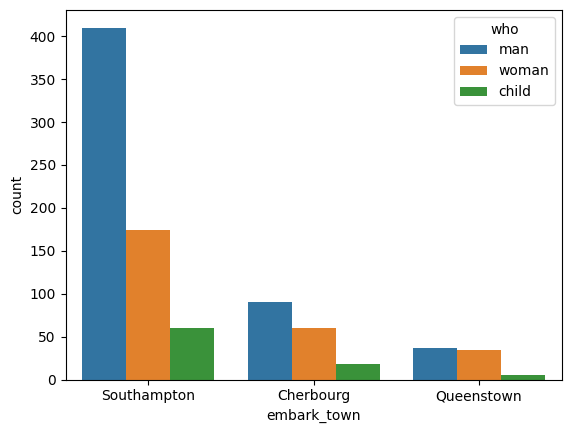

In [238]:
sns.countplot(x = "embark_town", data = df_titanic, hue = "who");

In [208]:
df.groupby(["embark_town"])["alive"].value_counts(normalize=True)*100

embark_town  alive
Cherbourg    yes      55.357143
             no       44.642857
Queenstown   no       61.038961
             yes      38.961039
Southampton  no       66.099071
             yes      33.900929
Name: proportion, dtype: float64

In [212]:
df.groupby("embark_town")["class"].value_counts(normalize = True)*100

embark_town  class 
Cherbourg    First     50.595238
             Third     39.285714
             Second    10.119048
Queenstown   Third     93.506494
             Second     3.896104
             First      2.597403
Southampton  Third     54.643963
             Second    25.386997
             First     19.969040
Name: proportion, dtype: float64

In [243]:
df.groupby("embark_town")["who"].value_counts(normalize = True)*100

embark_town  who  
Cherbourg    man      53.571429
             woman    35.714286
             child    10.714286
Queenstown   man      48.051948
             woman    45.454545
             child     6.493506
Southampton  man      63.467492
             woman    27.244582
             child     9.287926
Name: proportion, dtype: float64

In [56]:
df.groupby(["embark_town"])["class"].value_counts(normalize = True).mul(100).reset_index().T

,0,1,2,3,4,5,6,7,8
embark_town,Cherbourg,Cherbourg,Cherbourg,Queenstown,Queenstown,Queenstown,Southampton,Southampton,Southampton
class,First,Third,Second,Third,Second,First,Third,Second,First
proportion,50.595238,39.285714,10.119048,93.506494,3.896104,2.597403,54.643963,25.386997,19.96904


In [54]:
df.groupby(["embark_town","who"])["class"].value_counts(normalize = True).mul(100).reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
embark_town,Cherbourg,Cherbourg,Cherbourg,Cherbourg,Cherbourg,Cherbourg,Cherbourg,Cherbourg,Queenstown,Queenstown,...,Queenstown,Southampton,Southampton,Southampton,Southampton,Southampton,Southampton,Southampton,Southampton,Southampton
who,child,child,man,man,man,woman,woman,woman,child,man,...,woman,child,child,child,man,man,man,woman,woman,woman
class,Third,Second,First,Third,Second,First,Third,Second,Third,Third,...,First,Third,Second,First,Third,Second,First,Third,Second,First
proportion,83.333333,16.666667,46.666667,43.333333,10.0,71.666667,20.0,8.333333,100.0,94.594595,...,2.857143,63.333333,26.666667,10.0,59.756098,21.707317,18.536585,39.772727,33.522727,26.704545


In [55]:
df.groupby(["embark_town"])["alive"].value_counts(normalize=True).mul(100).reset_index(name = "pct%").T

,0,1,2,3,4,5
embark_town,Cherbourg,Cherbourg,Queenstown,Queenstown,Southampton,Southampton
alive,yes,no,no,yes,no,yes
pct%,55.357143,44.642857,61.038961,38.961039,66.099071,33.900929


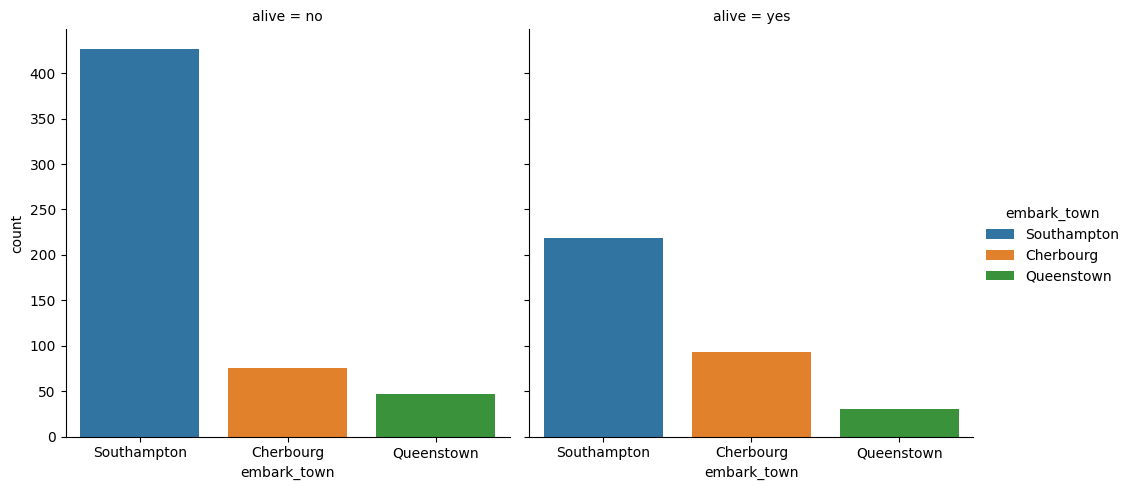

In [235]:
sns.catplot(df,x="embark_town", col ="alive",kind = "count", hue ="embark_town", legend = True);

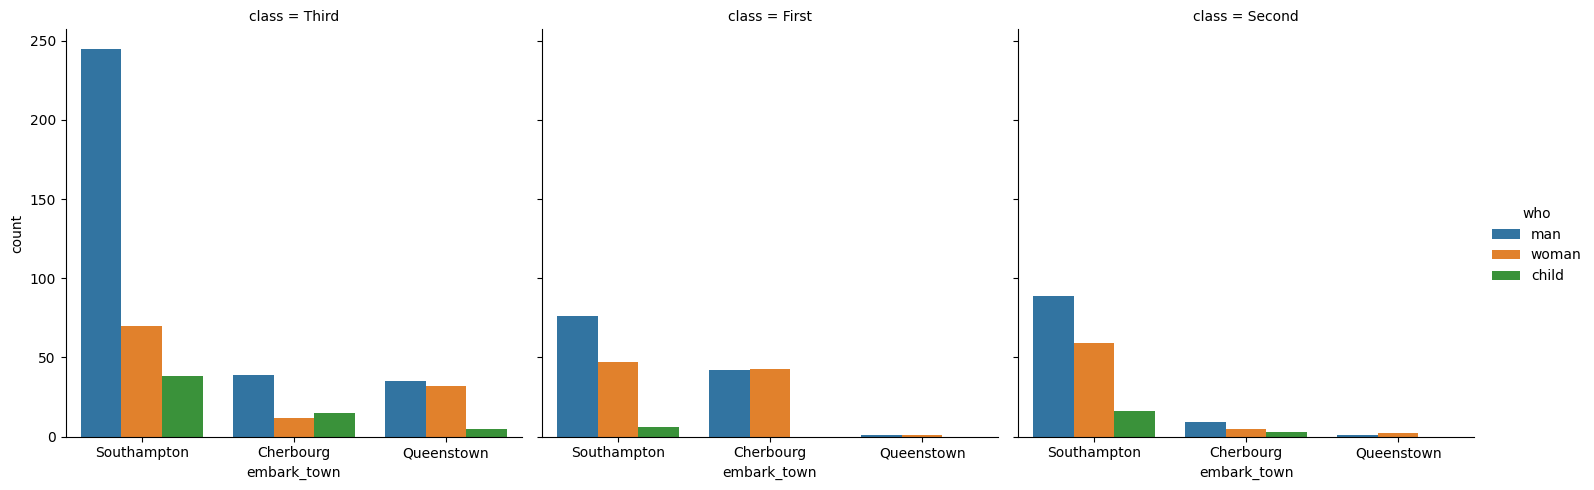

In [236]:
sns.catplot(df,x="embark_town", col ="class",kind = "count", hue ="who", legend = True);

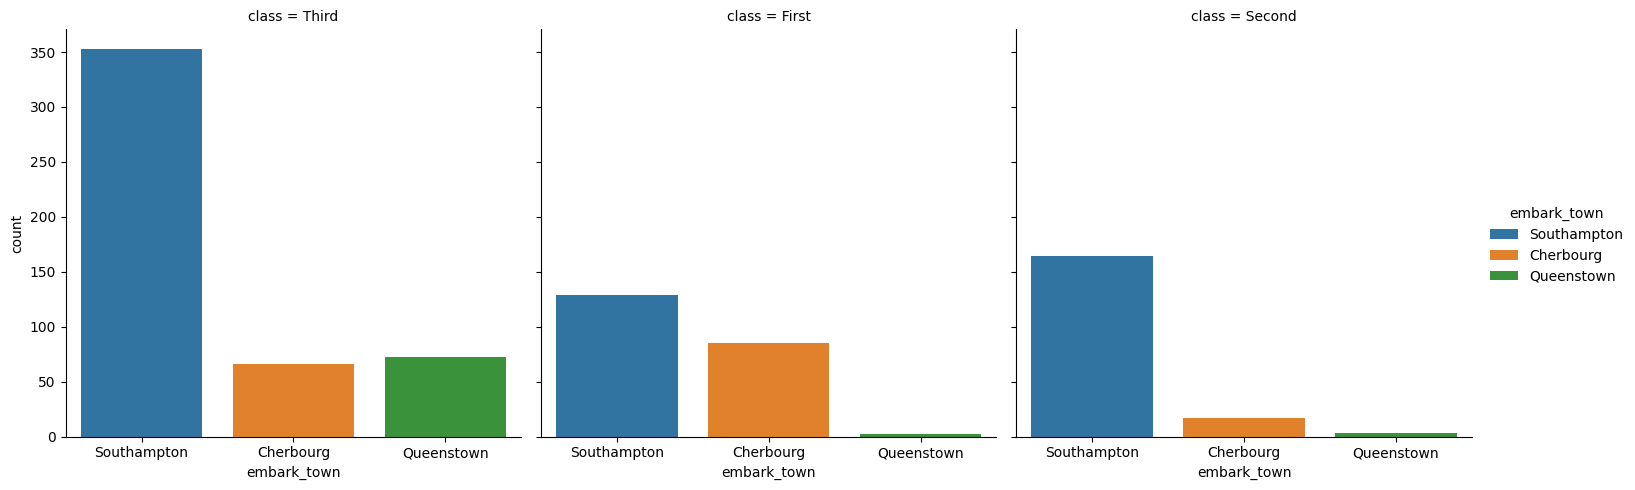

In [43]:
sns.catplot(df,x="embark_town", col ="class",kind = "count", hue ="embark_town", legend = True);

## Conclusion 5
El puerta de embarque parece tener influencia, pero mas bien fue la clase de pasaje que embarcó en cada uno de ellos.
Explorando los datos, parece que los pasajeros que embarcaron en Cherbourg tienen una tasa alta de supervivencia.(55%) 
Cuando investigamos un poco mas, vemos que eso occure porque el (50%) de los pasajeros que embarcaron en Cherbourg viajaban en primera clase, de los cuales, un gran porcentaje eran mujeres.